In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

credentials_path = './../pamf-dwh-775beaae50ff.json'
project_id = 'pamf-dwh'

In [2]:
data = pd.read_csv("cbs_deb_forecast.csv", sep=';')

In [3]:
data['s']=data['s'].apply(lambda x : pd.to_datetime(x))

In [4]:
data['month']=data['s'].dt.month

In [5]:
data.head(2)

,s,F1,F2,F3,Nombre d'enregistrements,month
0,2015-01-15,2015,Jan,781,1,1
1,2015-02-15,2015,Feb,707,1,2


In [6]:
data.rename(columns={'F1':'year','F3':'disbursments(nbr)'}, inplace=True)

In [7]:
df = data.set_index('s')

Text(0.5,1,'Avg disbursment per year since 2015')

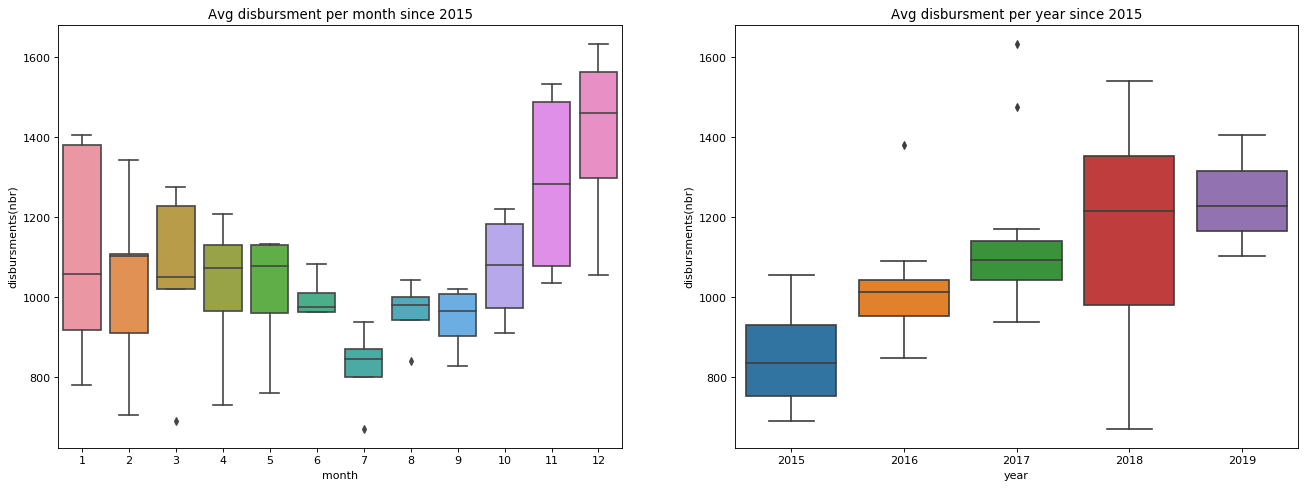

In [8]:
fig, axes = plt.subplots(1,2, figsize = (20,7), dpi = 80)
sns.boxplot(x=data['month'], y=data['disbursments(nbr)'], data = data.loc[~data.year.isin([2005,2019]),:], ax=axes[0])
axes[0].set_title("Avg disbursment per month since 2015")
sns.boxplot(x=data['year'], y=data['disbursments(nbr)'], data = data.loc[~data.year.isin([2005,2019]),:], ax= axes[1])
axes[1].set_title("Avg disbursment per year since 2015")

In [ ]:
"""get values of mean from box plot"""

## Observations:
### - Since 2015, we observe an increase of the disbursement number
### - 2016 and 2017 appear to have smaller quarterfinal range (IQR)
### - 2015 and 2019 seem to have the same IQR
### - in terms of median 2018 is pretty similar to 2019, however it has high upside and downside and has the highest range among the other years. The minimum value is far from the first quantile (0.25% of the data)
### - The monthly plot shows us:
#### * The avg number of disbursement pattern is increasing all over the year and reaches its peak in December
#### * Highest range (length of the box) of disbursment occured in January, November and december
####    * January till May display a phase of stagnation in terms of median followed by a decrease in number in June, July, August and September.
####    * A rapid increase is observed from October till December though.

In [ ]:
!wget https://raw.githubusercontent.com/JaeDukSeo/sample_data/master/aapl.csv

In [ ]:
df = pd.read_csv('aapl.csv',sep=',' ) #,usecols=['Date','Open','High','Low','Close'])

In [ ]:
df.head()

In [ ]:
date_start = data["s"].min() 
date_end = data["s"].max()

In [ ]:
daterange = pd.date_range(date_start,  date_end)  #[::-1]

In [ ]:
data #['disbursments(nbr)'].values

## stationarity test- The Augmented Dickey-Fuller Test

In [9]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['disbursments(nbr)'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.343372
p-value: 0.158361
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


### Non stationary but stochastic

# Time Series Decomposition

In [ ]:
import fix_yahoo_finance as yf  
Data = yf.download(Symbol, start, end)

In [ ]:
dt = data[['s', 'disbursments(nbr)']]

In [ ]:
dt.dtypes

In [ ]:


import statsmodels.api
import statsmodels as sm

res = sm.tsa.seasonal.seasonal_decompose(data['disbursments(nbr)'],model='additive', freq=12)
#resplot =
res.plot()



## Seasonality

### 1) Additive model

In [11]:
#monthly_summary = data.groupby('month').sum() #.resample('M').sum()

In [12]:
data.set_index(data['s'], inplace=True)

In [13]:
monthly_summary = data.set_index('s') #data.resample('M').sum()

In [14]:
monthly_summary.dtypes


year                         int64
F2                          object
disbursments(nbr)            int64
Nombre d'enregistrements     int64
month                        int64
dtype: object

In [15]:
monthly_summary.head(2)

,year,F2,disbursments(nbr),Nombre d'enregistrements,month
s,,,,,
2015-01-15,2015,Jan,781,1,1
2015-02-15,2015,Feb,707,1,2


In [16]:
monthly_summary.drop(columns=["year","Nombre d'enregistrements","month", 'F2'], inplace=True)

Text(0.5,1,'Seasonality')

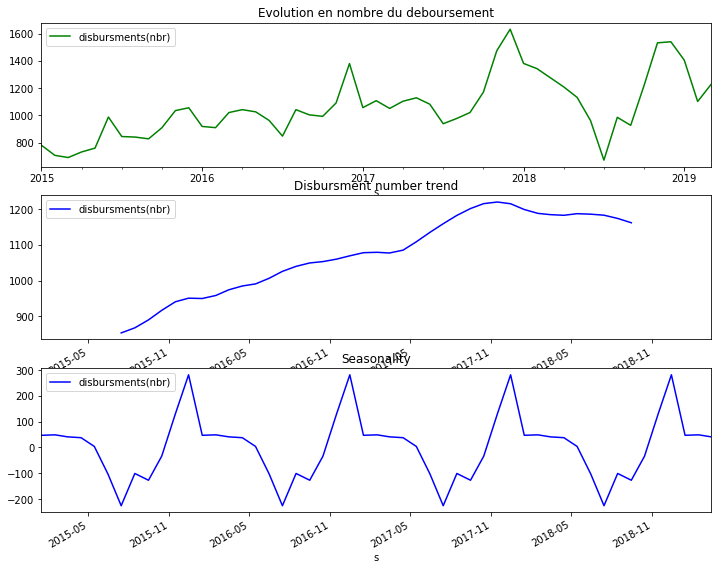

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize = (12, 10))

# store types
monthly_summary.resample('M').sum().plot(color = 'g', ax = ax1)
ax1.set_title("Evolution en nombre du deboursement")
## Yearly trend

decomposition = seasonal_decompose(monthly_summary, model = 'additive' , freq = 12)
decomposition.trend.plot(color = 'b', ax = ax2)
ax2.set_title("Disbursment number trend")

# Seasonality
decomposition = seasonal_decompose(monthly_summary, model = 'additive'  , freq = 12)
decomposition.seasonal.plot(color = 'b', ax = ax3)
ax3.set_title("Seasonality")

## 2) Multiplicative

Text(0.5,1,'Seasonality')

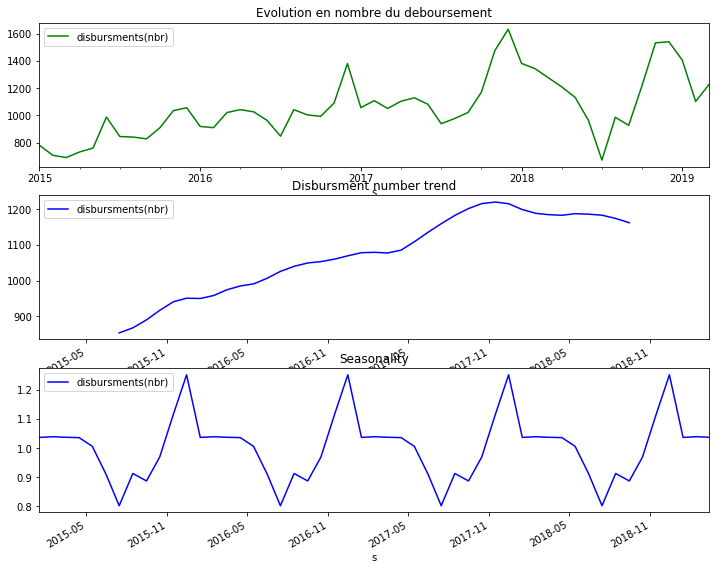

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize = (12, 10))

# store types
monthly_summary.resample('M').sum().plot(color = 'g', ax = ax1)
ax1.set_title("Evolution en nombre du deboursement")
## Yearly trend

decomposition = seasonal_decompose(monthly_summary, model = 'multiplicative' , freq =12 )
decomposition.trend.plot(color = 'b', ax = ax2)
ax2.set_title("Disbursment number trend")


# Seasonality
decomposition = seasonal_decompose(monthly_summary, model = 'multiplicative'  , freq = 12)
decomposition.seasonal.plot(color = 'b', ax = ax3)
ax3.set_title("Seasonality")

## Autocorrelation

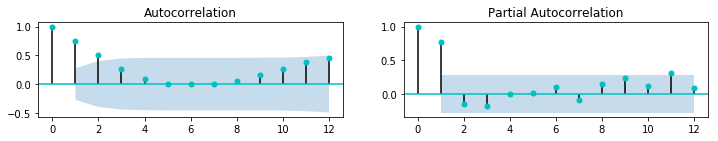

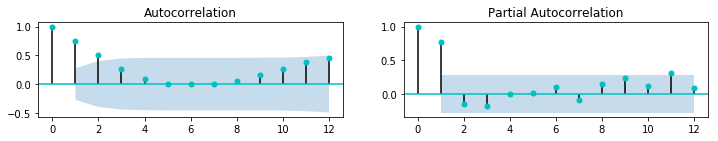

In [26]:
# figure for subplots
plt.figure(figsize = (12, 8))

# acf and pacf 
plot1 = plt.subplot(421); plot_acf(monthly_summary, lags = 12, ax = plt.gca(), color = 'c')
plot2 = plt.subplot(422); plot_pacf(monthly_summary, lags = 12, ax = plt.gca(), color = 'c')
#plot1.savefig("Autocorrelation.png")

In [39]:
tst = monthly_summary[['disbursments(nbr)']]-monthly_summary[['disbursments(nbr)']].shift(1)


In [50]:
data

,s,year,F2,disbursments(nbr),Nombre d'enregistrements,month
s,,,,,,
2015-01-15,2015-01-15,2015,Jan,781,1,1
2015-02-15,2015-02-15,2015,Feb,707,1,2
2015-03-15,2015-03-15,2015,Mar,691,1,3
2015-04-15,2015-04-15,2015,Apr,732,1,4
2015-05-15,2015-05-15,2015,May,760,1,5
2015-06-15,2015-06-15,2015,Jun,988,1,6
2015-07-15,2015-07-15,2015,Jul,845,1,7
2015-08-15,2015-08-15,2015,Aug,841,1,8
2015-09-15,2015-09-15,2015,Sep,828,1,9


E:\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: Unknown property lags

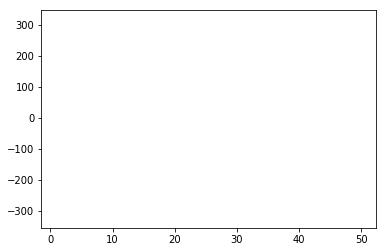

In [60]:
sns.tsplot(tst['disbursments(nbr)'], lags = 30) #, value = 'disbursments(nbr)',time='s', unit='subject')

In [59]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'poin

# FIN

In [ ]:
from numpy import newaxis
#import plotly.express as px
from plotly import graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_summary.values, freq=12) 
trace1 = go.Scatter(
    x = data.month,y = decomposition.trend,
    name = 'Trend',mode='line'
)
trace2 = go.Scatter(
    x = data.month,y = decomposition.seasonal,
    name = 'Seasonal',mode='line'
)
trace3 = go.Scatter(
    x = data.month,y = decomposition.resid,
    name = 'Residual',mode='line'
)
trace4 = go.Scatter(
    x = data.month,y = data['disbursments(nbr)'],
    name = 'Mean Stock Value',mode='line'
)

plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
#plot(trace1)



In [ ]:
decomposition = seasonal_decompose(monthly_summary['disbursments(nbr)'], model = 'additive', freq = 12)
decomposition.trend.plot(color = 'b') #, ax = ax2)
decomposition.seasonal.plot(color = 'b')

In [ ]:
sns.lineplot(x = data.month,y = decomposition.trend)

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import pandas as pd
import numpy as np,sys
#import tensorflow as tf
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

import matplotlib.pyplot as plt
from numpy import newaxis

# 0. Get the Data and simple sorting and check NaN
df = pd.read_csv('aapl.csv',delimiter=',',usecols=['Date','Open','High','Low','Close'])
df.Date = pd.to_datetime(df.Date)
df['Mean'] = (df.High + df.Low )/2.0



from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.Mean.values, freq=365) 
trace1 = go.Scatter(
    x = df.Date,y = decomposition.trend,
    name = 'Trend',mode='line'
)
trace2 = go.Scatter(
    x = df.Date,y = decomposition.seasonal,
    name = 'Seasonal',mode='line'
)
trace3 = go.Scatter(
    x = df.Date,y = decomposition.resid,
    name = 'Residual',mode='line'
)
trace4 = go.Scatter(
    x = df.Date,y = df.Mean,
    name = 'Mean Stock Value',mode='line'
)


# a. Standard Average of Window
"""Mean_list = list(df.Mean)
window_size = 50
N = len(Mean_list)
std_avg_predictions = list(Mean_list[:window_size])
for pred_idx in range(window_size,N):
    std_avg_predictions.append(np.mean(Mean_list[pred_idx-window_size:pred_idx]))

# b. EXP Average of Window
window_size = 100
run_avg_predictions = []
running_mean = 0.0
run_avg_predictions.append(running_mean)
decay = 0.8

for pred_idx in range(1,N):
    running_mean = running_mean*decay + (1.0-decay)*Mean_list[pred_idx-1]
    run_avg_predictions.append(running_mean)

trace5 = go.Scatter(
    x = df.Date,y = std_avg_predictions,
    name = 'Window AVG',mode='line'
)
trace6 = go.Scatter(
    x = df.Date,y = run_avg_predictions,
    name = 'Moving AVG',mode='line'
)




from statsmodels.tsa.ar_model import AR
window_size = 50
ar_list = list(Mean_list[:window_size])
for pred_idx in range(window_size,N):

    current_window = Mean_list[pred_idx-window_size:pred_idx]
    model = AR(current_window)
    model_fit = model.fit(49)
    current_predict = model_fit.predict(49,49)[0]
    ar_list.append(current_predict)

trace7 = go.Scatter(
    x = df.Date,y = ar_list,
    name = 'Auto Regression',mode='line'
)

data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7]
plot(data)

import matplotlib.pyplot as plt"""

plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
#plt.plot(std_avg_predictions)
#plt.plot(run_avg_predictions)
#plt.show(ar_list)
